In [1]:
# YOUR CODE HERE
import requests
from bs4 import BeautifulSoup

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib

In [2]:
url = "http://books.toscrape.com/"

# TODO: Use `requests` to do an HTTP request to fetch data located at that URL
response = requests.get(url)

# TODO: Create a `BeautifulSoup` instance with that data
soup = BeautifulSoup(response.content, "html.parser")

soup

<!DOCTYPE html>

<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en-us"> <!--<![endif]-->
<head>
<title>
    All products | Books to Scrape - Sandbox
</title>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta content="24th Jun 2016 09:29" name="created"/>
<meta content="" name="description"/>
<meta content="width=device-width" name="viewport"/>
<meta content="NOARCHIVE,NOCACHE" name="robots"/>
<!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
<!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
<link href="static/oscar/favicon.ico" rel="shortcut icon"/>
<link href="static/oscar/css/styles.css" rel="stylesheet" type="text/css"/>
<link href="s

In [3]:
books_html = soup.find_all("article", class_="product_pod")

len(books_html)

20

## Parsing _one_ book

In [4]:
books_html[0]

<article class="product_pod">
<div class="image_container">
<a href="catalogue/a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
</div>
<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>
<h3><a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
<div class="product_price">
<p class="price_color">£51.77</p>
<p class="instock availability">
<i class="icon-ok"></i>
    
        In stock
    
</p>
<form>
<button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
</form>
</div>
</article>

In [5]:
book_title = books_html[0].find("h3").find("a").attrs["title"]

book_title

'A Light in the Attic'

In [6]:
book_price = float(books_html[0].find("p",class_="price_color").string[1:])
type(book_price)

float

In [7]:
book_stars_html = books_html[0].find("p", class_="star-rating")
book_stars_html

<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>

In [8]:
def parse_rating(rating_classes):
    # TODO: Look at `rating_classes` and return the correct rating
    # e.g. of an argument for `rating_classes`: [ 'star-rating', 'Three' ]
    # "One" => 1
    # "Two" => 2
    # "Three" => 3
    # "Four" => 4
    # "Five" => 5
    rating = {'One': 1,'Two':2,'Three': 3,'Four':4,'Five': 5}
    if rating_classes[1] in rating:
        return rating[rating_classes[1]]
    return 0

In [9]:
book_rating = parse_rating(books_html[0].find("p", class_="star-rating").attrs['class'])

book_rating

3

## Parsing _all_ books

In [10]:
books_dict = { 'Title': [], 'Price': [], 'Rating': [] }

In [11]:
for book in books_html:
    book_title = book.find("h3").find("a").attrs["title"]
    book_price = float(book.find("p",class_="price_color").string[1:])
    book_rating = parse_rating(book.find("p", class_="star-rating").attrs['class'])
    books_dict['Title'].append(book_title)
    books_dict['Price'].append(book_price)
    books_dict['Rating'].append(book_rating)



In [12]:
books_dict

{'Title': ['A Light in the Attic',
  'Tipping the Velvet',
  'Soumission',
  'Sharp Objects',
  'Sapiens: A Brief History of Humankind',
  'The Requiem Red',
  'The Dirty Little Secrets of Getting Your Dream Job',
  'The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull',
  'The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics',
  'The Black Maria',
  'Starving Hearts (Triangular Trade Trilogy, #1)',
  "Shakespeare's Sonnets",
  'Set Me Free',
  "Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)",
  'Rip it Up and Start Again',
  'Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991',
  'Olio',
  'Mesaerion: The Best Science Fiction Stories 1800-1849',
  'Libertarianism for Beginners',
  "It's Only the Himalayas"],
 'Price': [51.77,
  53.74,
  50.1,
  47.82,
  54.23,
  22.65,
  33.34,
  17.93,
  22.6,
  52.15,
  13.99,
  20.66,
  17.46,
  52.29,
  35.02,
  57.25,
  23.88,
  3

In [13]:
len(books_dict)         # You should have 3 key:value pairs
len(books_dict["Title"]) # Each value should contain 20 elements from the 20 books, as many as on the web page!

20

## Loading data in Pandas

In [14]:
books_df = pd.DataFrame(books_dict)
books_df

,Title,Price,Rating
0,A Light in the Attic,51.77,3
1,Tipping the Velvet,53.74,1
2,Soumission,50.10,1
3,Sharp Objects,47.82,4
4,Sapiens: A Brief History of Humankind,54.23,5
5,The Requiem Red,22.65,1
6,The Dirty Little Secrets of Getting Your Dream...,33.34,4
7,The Coming Woman: A Novel Based on the Life of...,17.93,3
8,The Boys in the Boat: Nine Americans and Their...,22.60,4
9,The Black Maria,52.15,1


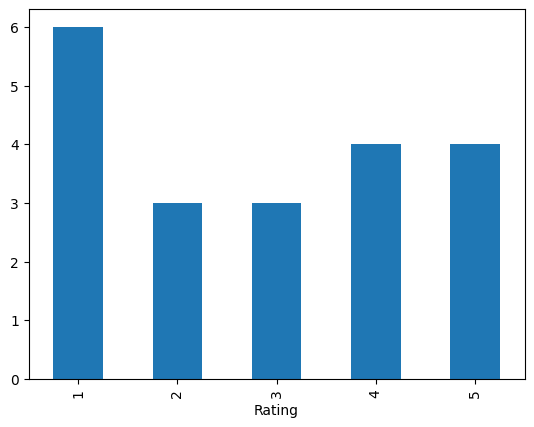

In [15]:
books_df.groupby("Rating").count()["Title"].plot(kind="bar");

In [16]:
from nbresult import ChallengeResult

result = ChallengeResult('books',
    books_dict=books_dict,
    columns=books_df.columns,
    title=str(books_df.loc[0,'Title']),
    price=books_df.loc[0,'Price'],
    rating=books_df.loc[0,'Rating']
)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-7.1.3, pluggy-1.0.0 -- /home/victor/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/victor/code/Fenrir1958/dotfiles/4-Data Sourcing/02-Scraping/tests
plugins: asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 5 items

test_books.py::TestBooks::test_books_df_columns_name PASSED              [ 20%]
test_books.py::TestBooks::test_books_df_columns_size PASSED              [ 40%]
test_books.py::TestBooks::test_first_book_price PASSED                   [ 60%]
test_books.py::TestBooks::test_first_book_rating PASSED                  [ 80%]
test_books.py::TestBooks::test_first_book_title PASSED                   [100%]

============================== 5 passed in 0.24s ===============================


💯 You can commit your code:

git add tests/books.pickle

git commit -m 'Completed books step'

git push origin master



## Going through all the pages of the catalogue

In [17]:
page = 1
url = f"http://books.toscrape.com/catalogue/page-{page}.html"
url

'http://books.toscrape.com/catalogue/page-1.html'

In [18]:
MAX_PAGE = 3
for page in range(1, MAX_PAGE + 1):
    url = f"http://books.toscrape.com/catalogue/page-{page}.html"
    print(url)

http://books.toscrape.com/catalogue/page-1.html
http://books.toscrape.com/catalogue/page-2.html
http://books.toscrape.com/catalogue/page-3.html


In [19]:
all_books_dict = { 'Title': [], 'Price': [], 'Rating': [] }

MAX_PAGE = 3
for page in range(1, MAX_PAGE + 1):
    url = f"http://books.toscrape.com/catalogue/page-{page}.html"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    
    for book in books_html:
        book_title = book.find("h3").find("a").attrs["title"]
        book_price = float(book.find("p",class_="price_color").string[1:])
        book_rating = parse_rating(book.find("p", class_="star-rating").attrs['class'])
        all_books_dict['Title'].append(book_title)
        all_books_dict['Price'].append(book_price)
        all_books_dict['Rating'].append(book_rating)
        
print("Done!")


Done!


In [20]:
len(all_books_dict["Title"])

60

In [21]:
all_books_df = pd.DataFrame.from_dict(all_books_dict)
all_books_df.tail()

,Title,Price,Rating
55,Our Band Could Be Your Life: Scenes from the A...,57.25,3
56,Olio,23.88,1
57,Mesaerion: The Best Science Fiction Stories 18...,37.59,1
58,Libertarianism for Beginners,51.33,2
59,It's Only the Himalayas,45.17,2


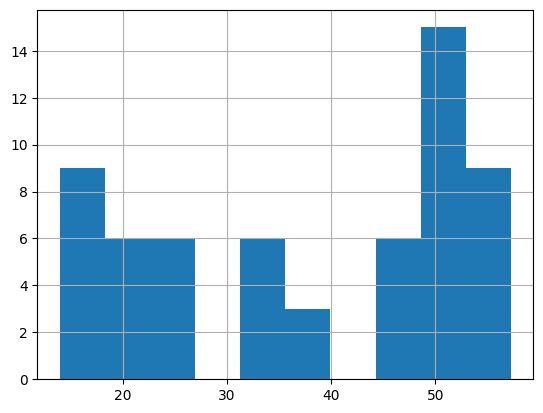

In [22]:
all_books_df["Price"].hist();

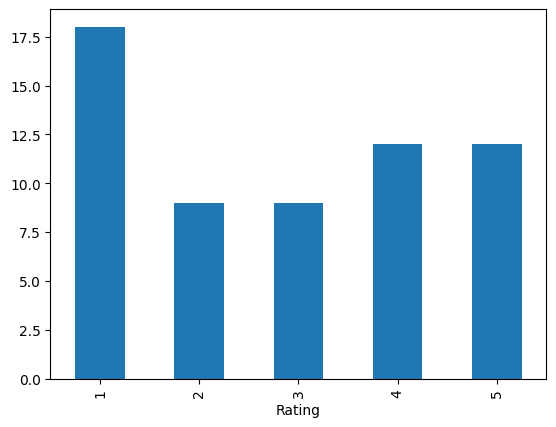

In [23]:
all_books_df.groupby("Rating").count()["Title"].plot(kind="bar");

## Saving the data for later

In [24]:
all_books_df.to_csv("books.csv")

In [25]:
pip install XlsxWriter

Note: you may need to restart the kernel to use updated packages.


In [26]:
all_books_df.to_excel('books.xlsx', sheet_name='Books')